# PROJET  MOGPL <font color='red'> *'CHEMIN LE PLUS COURT'* </font>
    ABITBOL Yossef, 3804139
    ZARROUK Yael,  21107919

## IMPORT

In [7]:
import copy
import numpy as np
import matplotlib.pyplot as plt
import time
import networkx as nx
import pickle
import random
import math
print("succes!")

succes!


# FONCTIONS POUR LA CREATION DU GRAPHE CLASSIQUE
- soit on cree le graphe depuis un fichier txt, <br>
- soit on le cree grace au terminal, on entre toutes les données nécessaires. 

## CREATION DU GRAPHE DEPUIS UN FICHIER TXT 
fonction : **ouvrir_fichier(chemin_fichier)** <br>
Cette fonction nous renvoi : <br>
        - un dictionnaire de sommets avec comme cle les sommet et pour valeur un index de (0 , nombre de sommets -1), <br>
        - un ensemble d'arcs.
<br> renvoi : G

In [8]:
def ouvrir_fichier(chemin_fichier):
    """str -> int * int * list[str] * list[list[str]]
    
    Cette fonction permet de soustraire du fichier texte son nombre de sommets, d'arcs ainsi que les sommets et les arcs
    """
    with open(chemin_fichier) as f : # on ouvre le fichier
        f = f.read().splitlines()  # on split en fonction des lignes 
        
         # on a le nombre de sommets 
        nombres_sommets = int(f[0])
        print(f"Le nombre de sommets est :  {nombres_sommets}")
        
        # on a le nombre d'arcs
        nombres_arcs = int(f[1])  
        print(f"Le nombres d'arc est : {nombres_arcs}")

        ###################  LES SOMMETS  
        sommets = []
        for i in range(2,nombres_sommets+2): #+2 car les premieres cases sont le nb de sommets et d'arcs 
            sommets.append(f[i])
#         print(f"Les sommets sont :{sommets}")
        sommets2 = {} 
        for i in range(len(sommets)): # on transforme les sommets en dico pour avoir des index lié a  chaque sommet
            sommets2[sommets[i]] = i 
        
        ###################  LES ARCS
        arcs2 = set() # pour eviter les doublons
        for i in range(2+nombres_sommets,len(f)):
#             print(f[i])
            g = f[i]
            g = g[1:-1].split(",") # on supprime les parentheses et on split en fonction des virgules
            arcs2.add((g[0],g[1],g[2],g[3])) # de la forme (u,v,t,lambda)
                
    return sommets2, arcs2

In [9]:
#---------------------------------------------TEST--------------------------------------------- 
f = 'instancetest2.txt' 
# f= 'instancetest.txt'
G = ouvrir_fichier(f) # ce G va nous etre utile pour la suite
print("---------------------------------------------------------------------------")
print(G)

Le nombre de sommets est :  5
Le nombres d'arc est : 7
---------------------------------------------------------------------------
({'a': 0, 'b': 1, 'c': 2, 'f': 3, 'g': 4}, {('c', 'g', '7', '1'), ('a', 'b', '1', '1'), ('c', 'f', '6', '1'), ('a', 'b', '2', '1'), ('a', 'c', '2', '1'), ('b', 'f', '5', '1'), ('a', 'c', '4', '1')})


## fichier different
ouvrir_fichier2(fichier)

In [10]:
def ouvrir_fichier2(fichier):
    """str -> int * int * list[str] * list[list[str]]
    
    Cette fonction permet de soustraire du fichier texte son nombre de sommets, d'arcs ainsi que les sommets et les arcs
    """
    with open(fichier) as f : # on ouvre le fichier
        f = f.read().splitlines()  # on split en fonction des lignes 
        
         # on a le nombre de sommets 
        n= f[0].split("%")
        nombres_sommets = int(n[0])
        print(f"Le nombre de sommets est :  {nombres_sommets}")
        
        f = f[1 : ]
        # on a le nombre d'arcs
        n = f[0].split("%")
        nombres_arcs = int(n[0])  
        print(f"Le nombres d'arc est : {nombres_arcs}")
        
        f= f[1:]
        ###################  LES SOMMETS
        n = f[0:nombres_sommets]
        sommets = []
        for i in range(len(n)):
            tpt = n[i].split(" ")
            sommets.append(tpt[1])
#         print(f"Les sommets sont :{sommets}")
        sommets2 = {} 
        for i in range(len(sommets)): # on transforme les sommets en dico pour avoir des index lié a  chaque sommet
            sommets2[sommets[i]] = i 
        
        f= f[nombres_sommets:]
        ###################  LES ARCS
        arcs2 = set() # pour eviter les doublons
        for i in range(len(f)):
            tpt = f[i].split(" ")
            g = tpt[1]
            g = g[1:-1].split(",") # on supprime les parentheses et on split en fonction des virgules
            arcs2.add((g[0],g[1],g[2],g[3])) # de la forme (u,v,t,lambda)
                
    return sommets2, arcs2

In [11]:
#---------------------------------------------TEST--------------------------------------------- 
testcommentaire = ouvrir_fichier2('testcommentaire.txt')
print(testcommentaire)

Le nombre de sommets est :  5
Le nombres d'arc est : 7
({'a': 0, 'b': 1, 'c': 2, 'f': 3, 'g': 4}, {('c', 'g', '7', '1'), ('a', 'b', '1', '1'), ('c', 'f', '6', '1'), ('a', 'b', '2', '1'), ('a', 'c', '2', '1'), ('b', 'f', '5', '1'), ('a', 'c', '4', '1')})


## PREND EN PARAMETRE LES ARCS ET SOMMETS DEPUIS LE TERMINAL 
fonction : **creer_graphe_terminal()**

In [12]:
def creer_graphe_terminal():
    """
    Cette fonction permet de creer un graphe avec les données entres sur le terminal
    """
    #------------------------------ NOMBRE DE SOMMETS ------------------------------
    condition = True 
    while condition : 
        nombre_sommets = input(">>> veillez entrer le nombre de sommets :")
        # print(type(nombre_sommets))
        try:
            int(nombre_sommets)
            condition = False
        except ValueError:
            print("----- Veillez entrer un nombre -----")
            
    # ------------------------------ NOMBRE D'ARCS ------------------------------       
    condition = True 
    while condition : 
        nombre_arcs = input(">>> veillez entrer le nombre d'arcs :")
        # print(type(nombre_arcs))
        try:
            int(nombre_arcs)
            condition = False
        except ValueError:
            print("----- veillez entre un nombre -----")
    
    #------------------------------ LES SOMMETS ------------------------------
    condition = True 
    sommet =[]
    while condition : 
        cpt = input("veillez entrer le sommet (string) :")
        sommet.append(cpt)
        # print(type(sommets))
        if len(sommet) == int(nombre_sommets):
            condition = False
        elif (len(sommet) < int(nombre_sommets)):
            print(">>> sommet suivant ")  
            
    sommets2 = {} 
    for i in range(len(sommet)): # on transforme les sommets en dico pour avoir des index lié a  chaque sommet
        sommets2[sommet[i]] = i
    #------------------------------ LES ARCS ------------------------------
    condition1 = True 
    condition2 = True 
    arcs = set()
    while condition1 : 
        print("veillez entrer l'arc (u, v, temps, lambda)") 
        while condition2 : 
            u = input("--> commencons par u, le sommet de départ : ")
            # on test que u est bien un sommet 
            if  u in sommet: 
                condition2 = False 
            else :
                print("u n'est pas un sommet") 
                    
        while not(condition2) : 
            v = input("--> maintenant v , le sommet d'arrivé : ")
            # on test que u est bien un sommet
            if  v in sommet and v != u: 
                condition2 = True  
            else :
                print("v n'est pas un sommet valable ")         
         
        while condition2 : 
            temps = input("--> entrer le temps t de l'arc :")
            try:
                int(temps)
                condition2 = False
            except ValueError:
                print("----- Veillez entrer un nombre -----")
        while not(condition2) : 
            lambd = input("--> entrer lambda :")
            try:
                int(lambd)
                condition2 = True
            except ValueError:
                print("----- Veillez entrer un nombre -----")
                
        arcs.add((u,v,temps,lambd))
        # print(type(sommets))
        if len(arcs) == int(nombre_arcs):
            condition1 = False
        elif (len(arcs) < int(nombre_arcs)):
            print(">>> arc suivant ")  
    
    return sommets2 , arcs

In [ ]:
G_terminal = creer_graphe_terminal()
print(G_terminal)

In [ ]:
# G = G_terminal

## Transformation en graphe classique 
fonction : **graphe_classique(Graphe)** <br>
On renvoi ici les sommets et aretes du nouveau graphe classique <br>
retour : Gclassique

In [14]:
def graphe_classique(G):
    """
    Cette fonction permet de tranformer un multigraphe en graphe classique 
    """
    sommets , arcs = G
    sommet_classique = set()
    arcs_classique = set()
    
    for (u,v,time,lambd) in arcs:
        # Ajout des sommets
        sommet_classique.add((u,int(time))) #Vout
        sommet_classique.add((v,int(time)+int(lambd))) #Vin 
        # Ajout des aretes
        arcs_classique.add( ((u,int(time)),int(lambd),(v,int(time)+int(lambd)))) # Vout , lambda , Vin
        
    # ca va nous permettre de mettre les arcs a 0 entre les meme sommets 
    toRemove = sommet_classique.copy()
    while len(toRemove) != 0:
        u,t1 = toRemove.pop() # on prend un element de l'ensemble 
        # on cree une liste avec tous les elements qui ont le meme sommet 
        stock = []
        stock.append((u,t1))
        for v,t2 in toRemove :
            if u == v : 
                stock.append((v,t2)) # on met dans stock les meme elements de sommet u
        # on remet le sommet enleve dans l'ensemble 
        toRemove.add((u,t1))
        # on a du coup tout les elements dans la liste temporaire stock 
        stock = sorted(stock) # pour avoir que les arcs relie a ceux superieur directement 
        for i in range(len(stock)):
            toRemove.remove(stock[i])  # on enleve tous les sommets qu'on vient d'implementer
            if i < len(stock) - 1 :
                arcs_classique.add((stock[i],0,stock[i+1])) # on met l'arc a 0 

    liste1 = list(sommet_classique) # on transforme en dico
    sommetdic = {}
    for i in range(len(liste1)) :
        sommetdic[liste1[i]] = i

    return (sommetdic,arcs_classique)

In [15]:
#---------------------------------------------TEST--------------------------------------------- 
Gclassique = graphe_classique(G)
print(Gclassique)

({('c', 3): 0, ('b', 3): 1, ('f', 6): 2, ('a', 4): 3, ('a', 1): 4, ('b', 2): 5, ('c', 5): 6, ('b', 5): 7, ('g', 8): 8, ('c', 7): 9, ('a', 2): 10, ('f', 7): 11, ('c', 6): 12}, {(('b', 3), 0, ('b', 5)), (('c', 5), 0, ('c', 6)), (('f', 6), 0, ('f', 7)), (('c', 7), 1, ('g', 8)), (('c', 3), 0, ('c', 5)), (('a', 1), 0, ('a', 2)), (('a', 4), 1, ('c', 5)), (('a', 2), 0, ('a', 4)), (('a', 2), 1, ('b', 3)), (('b', 5), 1, ('f', 6)), (('b', 2), 0, ('b', 3)), (('a', 2), 1, ('c', 3)), (('c', 6), 1, ('f', 7)), (('a', 1), 1, ('b', 2)), (('c', 6), 0, ('c', 7))})


# FONCTIONS UTILES POUR DIJKSTRA

### Fonction pour trouver le sommet d'arrivé le plus élevé


In [16]:
def sommetMax(Gclassique, sommet_max , t_omega):
    """
    (dict{tuple(str,int) : int}, set((str,int),int,(str,int))) * str * int -> (str,int) 
    on cherche le sommet avec le temps le plus eleve 
    """
    sommet ,arcs = Gclassique 
    tpt = -math.inf 
    maximum = sommet_max
    for (s,t) in sommet :
        if s == sommet_max:
            if t > tpt and t<= t_omega:
                tpt = t
                maximum = s
    if tpt == -math.inf :
        return None 
    else:
        return (maximum, tpt)
        

In [17]:
#---------------------------------------------TEST--------------------------------------------- 
arrive = sommetMax(Gclassique,'c',math.inf)
print(arrive)

('c', 7)


### Fonction pour trouver le sommet de départ le moins élevé


In [18]:
def sommetMin(Gclassique, sommet_min , t_alpha):
    """
    (dict{tuple(str,int) : int}, set((str,int),int,(str,int))) * str * int -> (str,int) 
    on cherche le sommet avec le temps le moins eleve 
    """
    sommet ,arcs = Gclassique 
    tpt = math.inf
    minimum = sommet_min
    for (s,t) in sommet :
        if s == sommet_min:
            if t < tpt and t >= t_alpha:
                tpt = t
                maximum = s
    if tpt == math.inf :
        return None 
    else:
        return (minimum, tpt)

In [19]:
#---------------------------------------------TEST--------------------------------------------- 
depart = sommetMin(Gclassique,'a',-math.inf)
print(depart)

('a', 1)


### initialisation de dijkstra 
fonction : **initDijkstra(Gtype, init)** <br>
renvoi : degre , predecesseur 

In [20]:
def initDijkstra(G, sommet_init):
    """
    (dict{tuple(str,int) : int}, set((str,int),int,(str,int)))*(str,int) -> list[int]*list[]
    Cette fonction permet d'initialiser dijkstra en mettant le sommet 'de depart' a 0 et le reste a l'infini
    """
    sommets , arcs = G
    predecesseur = [None for i in range(len(sommets))]
    degres = [1000000 for i in range(len(sommets))]
    degres[sommets[sommet_init]] = 0
    return degres, predecesseur

In [21]:
#---------------------------------------------TEST--------------------------------------------- 
degre , pred = initDijkstra(Gclassique,depart)
print(degre)
print(pred)

[1000000, 1000000, 1000000, 1000000, 0, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000, 1000000]
[None, None, None, None, None, None, None, None, None, None, None, None, None]


In [22]:
def trouveMin(sommets,degre):
    """
    Cette fonction permet de trouver le minimum de degre minimum
    """
    minimum = math.inf
    sommet = None
    for s in sommets:
        if degre[sommets[s]] < minimum :
            minimum = degre[sommets[s]]
            sommet = s
    return sommet

In [23]:
#---------------------------------------------TEST--------------------------------------------- 
s , a = Gclassique
sommeet = trouveMin(s, degre)
print(sommeet)

('a', 1)


### maj dijkstra

# <font color='red'> Chemin d'arrivé au plus tot, Type I  </font>
Pour résoudre le probléme du **chemin d'arrivé au plus tot, de type 1,** on va procéder de la maniere suivante.<br>
Tout d'abord, on va transformer le multigraphe en un graphe classique grace aux fonctions précédentes et de ce nouveau graphe on va modifier la valeurs des arêtes.<br> Chaque arc de (u,t1) a (v,t2) de valeur x va etre **remplacé** par <font color='red' >la valeur de t2 - t1 </font>, sauf pour les arcs de (arrive,t1) a (arrive,t2) qui garde la valeur de 0. <br>
Enfin, on applique dijkstra entre le min du depart et le max de l'arrivée 

## Graphe classique en graphe de type 1


In [24]:
def transformation1(Gclassique, arrivee):
    """
    Ici, on transforme le graphe classique pour l'adapter a notre chemin de type 1
    """
    sommets, arcs = Gclassique # on extrait les sommets et les arcs 
    arcs_modif = set()
    for ((u,t1),time,(v,t2)) in arcs : # pour chaque arc 
        if u == v and u == arrivee: # si c'est l'arc d'arrive 
            arcs_modif.add(((u,t1),time,(v,t2))) # on laisse sa valeur, c'est a dire 0 
        else :
            arcs_modif.add( ((u,t1),(t2-t1),(v,t2))) # on ajoute les arcs en modifiant leur valeur par t2-t1 
    return sommets, arcs_modif

In [25]:
#---------------------------------------------TEST--------------------------------------------- 
G1 = transformation1(Gclassique,'f')
print(G1)

({('c', 3): 0, ('b', 3): 1, ('f', 6): 2, ('a', 4): 3, ('a', 1): 4, ('b', 2): 5, ('c', 5): 6, ('b', 5): 7, ('g', 8): 8, ('c', 7): 9, ('a', 2): 10, ('f', 7): 11, ('c', 6): 12}, {(('b', 2), 1, ('b', 3)), (('f', 6), 0, ('f', 7)), (('c', 7), 1, ('g', 8)), (('c', 5), 1, ('c', 6)), (('b', 3), 2, ('b', 5)), (('a', 4), 1, ('c', 5)), (('c', 3), 2, ('c', 5)), (('a', 2), 1, ('b', 3)), (('b', 5), 1, ('f', 6)), (('a', 2), 1, ('c', 3)), (('c', 6), 1, ('f', 7)), (('a', 1), 1, ('b', 2)), (('a', 1), 1, ('a', 2)), (('c', 6), 1, ('c', 7)), (('a', 2), 2, ('a', 4))})


## DIJKSTRA type 1
fonction : **dijkstra1(Gclassique, depart, arrivee, t_alpha, t_omega)** <br>


In [26]:
def dijkstra1(Gclassique, depart, arrivee, t_alpha, t_omega):
    """
    Cette fonction permet de faire l'algo de dijkstra pour le type I
    """
    G = transformation1(Gclassique,arrivee) #on transforme le graphe 
    arrivee = sommetMax(G,arrivee, t_omega) # le sommet max d'arrive 
    depart = sommetMin(G,depart, t_alpha) # le sommet min de depart 

    V,E = G
    
    Degres, Predecesseur = initDijkstra(G, depart) # on initialise les degres et predecesseur 
    
    DejaVu = set() #sommet visite 
    NonVisite = V.copy() # au depart aucun sommet visite 
    while len(NonVisite)!=0 and (trouveMin(NonVisite,Degres) != arrivee):
        # on cherche le successeur de degre min 
        s1,t1 = trouveMin(NonVisite,Degres)
        DejaVu.add(s1) # on ajoute le sommet visite
        NonVisite.pop((s1,t1)) # on le supprime des sommets non visite 
        for ((s,t),time,(s2,t2)) in E : # maj des dist
            if (s,t) == (s1,t1) : 
                # Si la distance du sommet de depart à s2 est plus grande 
                # que celle du sommet de depart à S1 plus celle de S1 à S2 
                if Degres[V[(s2,t2)]] > Degres[V[(s1,t1)]] + time : 
                    Degres[V[(s2,t2)]] = Degres[V[(s1,t1)]] + time #On prend ce nouveau chemin qui est plus court
                    Predecesseur[V[(s2,t2)]] = (s1,t1) #En notant par où on passe
    s = arrivee
    Sol = [s]
    while s != depart and s!=None :
        s = Predecesseur[V[s]]
        Sol = [s] + Sol
    if s == None:  
        return []
    return Sol

In [27]:
#---------------------------------------------TEST--------------------------------------------- 
print(dijkstra1(Gclassique,'a','f',-math.inf,math.inf))
#---------------------------------------------TEST--------------------------------------------- 
print(dijkstra1(Gclassique,'a','b',-math.inf,math.inf))
#---------------------------------------------TEST--------------------------------------------- 
print(dijkstra1(Gclassique,'b','g',-math.inf,math.inf))

[('a', 1), ('b', 2), ('b', 3), ('b', 5), ('f', 6), ('f', 7)]
[('a', 1), ('b', 2), ('b', 3), ('b', 5)]
[]


# <font color='red'> Chemin de départ au plus tard, Type II  </font>
Pour résoudre le probléme du **chemin de départ au plus tard, de type 2,** on va procéder de la maniere suivante.<br>
Tout d'abord, on va transformer le multigraphe en un graphe classique grace aux fonctions précédentes et de ce nouveau graphe on va modifier la valeurs des arêtes.<br> Chaque arc de (depart,t1) a (depart,t2) de valeur x va etre **remplacé** par <font color='red' >la valeur de 0 </font> et les autres arcs par ta-td. <br>
Enfin, on applique dijkstra entre le min du depart et le max de l'arrivée 

## Graphe classique en graphe de type 2

In [28]:
def transformation2(Gclassique,depart):
    """
    Cette fonction transforme le graphe classique  pour le type 2
    """
    sommets, arcs = Gclassique
    sommet_transforme, arcs_transforme = sommets,set()
    for ((u,tu),temps,(v,vt)) in arcs:
        if u == v and u == depart :
            arcs_transforme.add(((u,tu),0,(v,vt)))
        else:
            arcs_transforme.add(((u,tu),(vt-tu),(v,vt)))
    return sommet_transforme,arcs_transforme

In [29]:
#---------------------------------------------TEST--------------------------------------------- 
G2 = transformation2(Gclassique,'a')
print(G2)

({('c', 3): 0, ('b', 3): 1, ('f', 6): 2, ('a', 4): 3, ('a', 1): 4, ('b', 2): 5, ('c', 5): 6, ('b', 5): 7, ('g', 8): 8, ('c', 7): 9, ('a', 2): 10, ('f', 7): 11, ('c', 6): 12}, {(('b', 2), 1, ('b', 3)), (('c', 7), 1, ('g', 8)), (('c', 5), 1, ('c', 6)), (('b', 3), 2, ('b', 5)), (('a', 1), 0, ('a', 2)), (('a', 4), 1, ('c', 5)), (('a', 2), 0, ('a', 4)), (('c', 3), 2, ('c', 5)), (('a', 2), 1, ('b', 3)), (('b', 5), 1, ('f', 6)), (('a', 2), 1, ('c', 3)), (('c', 6), 1, ('f', 7)), (('a', 1), 1, ('b', 2)), (('f', 6), 1, ('f', 7)), (('c', 6), 1, ('c', 7))})


## DIJKSTRA type 2
fonction : **dijkstra2(Gclassique, depart, arrivee, t_alpha, t_omega)** <br>

In [30]:
def dijkstra2(Gclassique, depart, arrivee, t_alpha, t_omega):
    """
    Cette fonction permet de faire l'algo de dijkstra pour le type II
    """
    G = transformation2(Gclassique,depart)
    arrivee = sommetMax(G,arrivee, t_omega) 
    depart = sommetMin(G,depart, t_alpha)

    V,E = G
    
    Degres, Predecesseur = initDijkstra(G, depart) # on initialise les degres et predecesseur 
    
    DejaVu = set()
    NonVisite = V.copy()
    while len(NonVisite)!=0 and (trouveMin(NonVisite,Degres) != arrivee):
        s1,t1 = trouveMin(NonVisite,Degres)
        DejaVu.add(s1)
        NonVisite.pop((s1,t1))
        for ((s,t),time,(s2,t2)) in E : # maj des dist
            if (s,t) == (s1,t1) :
                if Degres[V[(s2,t2)]] > Degres[V[(s1,t1)]] + time : 
                    Degres[V[(s2,t2)]] = Degres[V[(s1,t1)]] + time
                    Predecesseur[V[(s2,t2)]] = (s1,t1)
    s = arrivee
    Sol = [s]
    while s != depart and s!=None :
        s = Predecesseur[V[s]]
        Sol = [s] + Sol
    if s == None:  
        return []
    return Sol

In [31]:
#---------------------------------------------TEST--------------------------------------------- 
print(dijkstra2(Gclassique,'a','f',-math.inf,math.inf))
#---------------------------------------------TEST--------------------------------------------- 
print(dijkstra2(Gclassique,'a','c',-math.inf,math.inf))
#---------------------------------------------TEST--------------------------------------------- 
print(dijkstra2(Gclassique,'a','b',-math.inf,math.inf))

[('a', 1), ('a', 2), ('a', 4), ('c', 5), ('c', 6), ('f', 7)]
[('a', 1), ('a', 2), ('a', 4), ('c', 5), ('c', 6), ('c', 7)]
[('a', 1), ('a', 2), ('b', 3), ('b', 5)]


# <font color='red'> Chemin le plus rapide, Type III  </font>
Pour résoudre le probléme du **chemin le plus rapide, de type 3,** on va procéder de la maniere suivante.<br>
Tout d'abord, on va transformer le multigraphe en un graphe classique grace aux fonctions précédentes et de ce nouveau graphe on va modifier la valeurs des arêtes.<br> Chaque arc de (depart,t1) a (depart,t2) et (arrivee,t1) a (arrivee,t2) de valeur x va etre **remplacé** par <font color='red' >la valeur de 0 </font> et le reste des arcs de (u,t1) a (v,t2) sera remplacé par <font color='red' >t2 - t1</font>. <br>
Enfin, on applique dijkstra entre le min du depart et le max de l'arrivée 

## Graphe classique en graphe de type 3


In [32]:
def transformation3(Gclassique,depart,arrivee):
    """
    Cette fonction transforme le graphe classique  pour le type 3
    """
    sommets,arcs = Gclassique
    sommets_transforme,arcs_transforme = sommets,set()
    for ((u,tu),temps,(v,vt)) in arcs:
        if u == v and u == depart :
            arcs_transforme.add(((u,tu),0,(v,vt)))
        elif u == v and u == arrivee :
            arcs_transforme.add(((u,tu),0,(v,vt)))
        elif u == v :
            arcs_transforme.add(((u,tu),(vt-tu),(v,vt)))
        else:
            arcs_transforme.add(((u,tu),(vt-tu),(v,vt)))
    return sommets_transforme,arcs_transforme

In [33]:
#---------------------------------------------TEST--------------------------------------------- 
Gtype3 = transformation3(Gclassique,'a','d')
print(Gtype3)

({('c', 3): 0, ('b', 3): 1, ('f', 6): 2, ('a', 4): 3, ('a', 1): 4, ('b', 2): 5, ('c', 5): 6, ('b', 5): 7, ('g', 8): 8, ('c', 7): 9, ('a', 2): 10, ('f', 7): 11, ('c', 6): 12}, {(('b', 2), 1, ('b', 3)), (('c', 7), 1, ('g', 8)), (('c', 5), 1, ('c', 6)), (('b', 3), 2, ('b', 5)), (('a', 1), 0, ('a', 2)), (('a', 4), 1, ('c', 5)), (('a', 2), 0, ('a', 4)), (('c', 3), 2, ('c', 5)), (('a', 2), 1, ('b', 3)), (('b', 5), 1, ('f', 6)), (('a', 2), 1, ('c', 3)), (('c', 6), 1, ('f', 7)), (('a', 1), 1, ('b', 2)), (('f', 6), 1, ('f', 7)), (('c', 6), 1, ('c', 7))})


## DIJKSTRA type 3
fonction : **dijkstra3(Gclassique, depart, arrivee, t_alpha, t_omega)** <br>
renvoi : solution 

In [34]:
def dijkstra3(Gclassique, depart, arrivee, t_alpha, t_omega):
    """
    Cette fonction permet de faire l'algo de dijkstra pour le type III
    """
    G = transformation3(Gclassique,depart,arrivee)
    arrivee = sommetMax(G,arrivee, t_omega) 
    depart = sommetMin(G,depart, t_alpha)

    V,E = G
    
    Degres, Predecesseur = initDijkstra(G, depart) # on initialise les degres et predecesseur 
    
    DejaVu = set()
    NonVisite = V.copy()
    while len(NonVisite)!=0 and (trouveMin(NonVisite,Degres) != arrivee):
        s1,t1 = trouveMin(NonVisite,Degres)
        DejaVu.add(s1)
        NonVisite.pop((s1,t1))
        for ((s,t),time,(s2,t2)) in E : # maj des dist
            if (s,t) == (s1,t1) :
                if Degres[V[(s2,t2)]] > Degres[V[(s1,t1)]] + time : 
                    Degres[V[(s2,t2)]] = Degres[V[(s1,t1)]] + time
                    Predecesseur[V[(s2,t2)]] = (s1,t1)
    s = arrivee
    Sol = [s]
    while s != depart and s!=None :
        s = Predecesseur[V[s]]
        Sol = [s] + Sol
    if s == None:  
        return []
    return Sol

In [35]:
#---------------------------------------------TEST--------------------------------------------- 
print(dijkstra3(Gclassique,'a','b',-math.inf,math.inf))
#---------------------------------------------TEST--------------------------------------------- 
print(dijkstra3(Gclassique,'a','c',-math.inf,math.inf))
#---------------------------------------------TEST--------------------------------------------- 
print(dijkstra3(Gclassique,'a','d',-math.inf,math.inf))
#---------------------------------------------TEST--------------------------------------------- 
print(dijkstra3(Gclassique,'a','k',-math.inf,math.inf))

[('a', 1), ('a', 2), ('b', 3), ('b', 5)]
[('a', 1), ('a', 2), ('a', 4), ('c', 5), ('c', 6), ('c', 7)]
[]
[]


# <font color='red'> Le plus court chemin, Type IV  </font>
Pour résoudre ce type, on va prendre le graphe classique de base et on lui applique directement dijkstra du min{depart} au max{arrivee}. 

In [36]:
def dijkstra4(Gclassique, depart, arrivee, t_alpha, t_omega):
    """
        Cette fonction permet de faire l'algo de dijkstra pour le type IV
    """
    arrivee = sommetMax(Gclassique,arrivee, t_omega) 
    depart = sommetMin(Gclassique,depart, t_alpha)

    V,E = Gclassique
    
    Degres, Predecesseur = initDijkstra(Gclassique, depart) # on initialise les degres et predecesseur 
    
    DejaVu = set()
    NonVisite = V.copy()
    while len(NonVisite)!=0 and (trouveMin(NonVisite,Degres) != arrivee):
        s1,t1 = trouveMin(NonVisite,Degres)
        DejaVu.add(s1)
        NonVisite.pop((s1,t1))
        for ((s,t),time,(s2,t2)) in E : # maj des dist
            if (s,t) == (s1,t1) :
                if Degres[V[(s2,t2)]] > Degres[V[(s1,t1)]] + time : 
                    Degres[V[(s2,t2)]] = Degres[V[(s1,t1)]] + time
                    Predecesseur[V[(s2,t2)]] = (s1,t1)
    s = arrivee
    Sol = [s]
    while s != depart and s!=None :
        s = Predecesseur[V[s]]
        Sol = [s] + Sol
    if s == None:  
        return []
    return Sol

In [37]:
#---------------------------------------------TEST--------------------------------------------- 
print(dijkstra4(Gclassique,'a','b',-math.inf,math.inf))
#---------------------------------------------TEST--------------------------------------------- 
print(dijkstra4(Gclassique,'a','c',-math.inf,math.inf))
#---------------------------------------------TEST--------------------------------------------- 
print(dijkstra4(Gclassique,'a','i',-math.inf,math.inf))
# print(Gclassique)

[('a', 1), ('a', 2), ('b', 3), ('b', 5)]
[('a', 1), ('a', 2), ('a', 4), ('c', 5), ('c', 6), ('c', 7)]
[]


# <font color='red'> Programmation Lineaire, Type IV  </font>
 On va implanter une méthode de recherche de chemin de Type IV en faisant appel a GUROBI.


In [38]:
from gurobipy import *

def PL4(Gclassique, departs, arrivees,t_alpha,t_omega):
    
    sommets,arcs = Gclassique
    
    depart = sommetMin(Gclassique,departs,t_alpha) # min des departs
    arivee = sommetMax(Gclassique,arrivees,t_omega) # max des arrives

        
    nbconst = len(sommets) # nombre de contraintes 
    nbvar = len(arcs) # nombre de variable de decision

    lines = range(nbconst)
    columns = range(nbvar)

    V = list(sommets) # liste sommets 
    E = [((s1,t1),(s2,t2)) for ((s1,t1),_,(s2,t2))in arcs] #liste aretes sans temps 

    A = np.zeros((nbconst, nbvar)) # matrice de contraintes , matrice incidente

    for (s1,t1),_,(s2,t2) in arcs: # pour tout les arcs 
        i, j = V.index( (s1,t1)), V.index((s2,t2)) # on prend le sommet de depart et d'arrive 
        k = E.index(((s1,t1), (s2,t2))) # on prend l'index de l'arc 
        A[i, k] = 1 # sommet de depart a 1 
        A[j, k] = -1 # sommet d'arrive a -1

    # Second member vector
    b = np.zeros(nbconst)
    b[V.index(depart)] = 1
    b[V.index(arivee)] = -1

    # Objective coefficients
    c = [time for (_,_),time,(_,_) in arcs] # le cout de l'arc 

    m = Model("pl")

    # Variables declaration (edges)
    x = [m.addVar(vtype=GRB.BINARY, lb=0, name=f"x{i+1}") for i in columns]

    # Model update
    m.update()

    obj = LinExpr()
    obj = 0
    for j in columns:
        obj += c[j] * x[j] #fonction objectif 

    # Define the objective function
    m.setObjective(obj, GRB.MINIMIZE)

    # Define constraints
    for i in lines:
        m.addConstr(quicksum(A[i][j] * x[j] for j in columns) == b[i], f"Contrainte{i}")

    # Resolve & build the path
    m.optimize()

    var = [depart]

    print("\nSolution optimale:")

    for j in columns:
        # print(f"x{j+1}\t= {int(x[j].x)}")
        if x[j].x == 1:
            var.append(E[j][1])

    print("\nValeur de la fonction objectif :", m.objVal)

    return var
    

In [39]:
#---------------------------------------------TEST--------------------------------------------- 
print(sorted(PL4(Gclassique,'a','b',-math.inf,math.inf)))
#---------------------------------------------TEST--------------------------------------------- 
print(sorted(PL4(Gclassique,'a','c',-math.inf,math.inf)))
#---------------------------------------------TEST--------------------------------------------- 
print(sorted(PL4(Gclassique,'a','f',-math.inf,math.inf)))
#---------------------------------------------TEST--------------------------------------------- 
print(sorted(PL4(Gclassique,'a','g',-math.inf,math.inf)))
# print(Gclassique)

Set parameter Username
Academic license - for non-commercial use only - expires 2022-02-01
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 13 rows, 15 columns and 30 nonzeros
Model fingerprint: 0x05e0d403
Variable types: 0 continuous, 15 integer (15 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 1.0000000
Presolve removed 13 rows and 15 columns
Presolve time: 0.01s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.05 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 1: 1 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.000000000000e+00, best bound 1.000000000000e+00, gap 0.0000%

Solution optimale:

Valeur de la fonction objectif : 1.0
[('a',

# **------------------------------------------------------------------**

# ------------------ <font color ='red'>**TEST DES ALGORITHMES**</font> ------------------ 

# **------------------------------------------------------------------**

## Test sur une instance commune 

In [46]:
#-------------------------------------------------- TEST -------------------------------------------------- 
#------------------------------ on test toute les fonctions sur une instance ------------------------------

# >>>>>>>> importer le fichier depuis un fichier texte 
f = 'testinstance3.txt'
# f = 'instancetest2.txt'
graphe = ouvrir_fichier2(f)

# >>>>>>>> on cree le multigraphe avec le terminal
#graphe = creer_graphe_terminal() 

# >>>>>>>> On transforme le multigraphe en graphe classique 
Gclassique = graphe_classique(graphe)
sommets , arcs = Gclassique
print(f">>>>> Les sommets du graphes classique sont : \n {sommets}")
print("-----     -----     -----     -----     -----     -----     -----    -----     -----     -----     -----    -----")
print(f">>>>> Les arcs du graphe classique sont : \n {arcs}") 

# >>>>>>>> On choisis les de depart et d'arrive 
depart = '1'
arrivee = '4'
t_alpha = -math.inf
t_omega = math.inf
print("-----------------------------------------------------------------------------------------------------------------")
print(f"On a choisis comme sommet de depart : {depart} \n et comme sommet d'arrive : {arrivee}")

print("-----------------------------------------------------------------------------------------------------------------") 
# ------------------------------ Chemin d'arrivé au plus tot, Type I ------------------------------
arrive_plus_tot = dijkstra1(Gclassique,depart,arrivee,t_alpha,t_omega)
print(f"Le chemin d'arrivee au plus tot de {depart} vers {arrivee} dans le graphe classique est le suivant : \n {arrive_plus_tot}")

print("-----------------------------------------------------------------------------------------------------------------")
# ------------------------------ Chemin de depart au plus tard, Type II ------------------------------
depart_plus_tard = dijkstra2(Gclassique,depart,arrivee,t_alpha,t_omega)
print(f"Le chemin de depart au plus tard de {depart} vers {arrivee} dans le graphe classique est le suivant: \n{depart_plus_tard}")

print("-----------------------------------------------------------------------------------------------------------------")
# ------------------------------ Chemin le plus rapide , Type III ------------------------------
plus_rapide = dijkstra3(Gclassique,depart,arrivee,t_alpha,t_omega)
print(f"Le chemin le plus rapide de {depart} vers {arrivee} dans le graphe classique est le suivant :\n {plus_rapide}")

print("-----------------------------------------------------------------------------------------------------------------")
# ------------------------------ Chemin le plus court, Type IV ------------------------------
plus_court = dijkstra4(Gclassique,depart,arrivee,t_alpha,t_omega)
print(f"Le chemin le plus court de {depart} vers {arrivee} dans le graphe classique est le suivant : \n{plus_court}")


print("-----------------------------------------------------------------------------------------------------------------") 
# ------------------------------ Chemin le plus court par programmation lineaire, type IV ------------------------------
PL = PL4(Gclassique, depart, arrivee, t_alpha, t_omega)
print(f"Le chemin le plus court par programmation lineaire de {depart} vers {arrivee} dans le graphe classique est le suivant : {sorted(PL)}")


Le nombre de sommets est :  5
Le nombres d'arc est : 9
>>>>> Les sommets du graphes classique sont : 
 {('3', 4): 0, ('1', 8): 1, ('3', 7): 2, ('2', 9): 3, ('2', 10): 4, ('2', 5): 5, ('4', 8): 6, ('3', 6): 7, ('4', 7): 8, ('5', 7): 9, ('4', 10): 10, ('1', 3): 11, ('5', 10): 12, ('2', 4): 13, ('3', 8): 14, ('1', 2): 15}
-----     -----     -----     -----     -----     -----     -----    -----     -----     -----     -----    -----
>>>>> Les arcs du graphe classique sont : 
 {(('2', 9), 1, ('4', 10)), (('2', 5), 1, ('3', 6)), (('3', 4), 0, ('3', 6)), (('2', 5), 0, ('2', 9)), (('4', 7), 0, ('4', 8)), (('3', 4), 3, ('4', 7)), (('2', 4), 0, ('2', 5)), (('2', 9), 0, ('2', 10)), (('3', 7), 1, ('4', 8)), (('1', 2), 8, ('2', 10)), (('1', 2), 6, ('3', 8)), (('1', 3), 0, ('1', 8)), (('3', 6), 1, ('5', 7)), (('5', 7), 0, ('5', 10)), (('4', 8), 0, ('4', 10)), (('3', 6), 0, ('3', 7)), (('3', 7), 0, ('3', 8)), (('1', 3), 1, ('2', 4)), (('1', 8), 2, ('5', 10)), (('1', 2), 0, ('1', 3))}
--------------

## Test sur des instances générés aléatoirement 

### Generation de graphe sans circuit 

In [41]:
def graphe_sans_circuit(n,p=0.5,lambd=1):
    """
    Cette fonction nous permet de créer des graphes sans circuit généres aléatoirement
    """
    sommets = []
    arcs = set()
    # on crée les sommets
    for i in range(n):
        sommets.append(str(i))
    
    # on crée les aretes 
    for i in range(len(sommets)):
        sommetRestants = sommets[(i+1):]
        # on voit que les sommets suivant et jamais ceux d'avant pour eviter d'avoir des circuits 
        for j in sommetRestants:
            tirage = random.random()
            if tirage <= p: # proba d'avoir un arc 
                arcs.add((str(i),j,random.randint(1,np.ceil(n/2)),lambd)) # la valeur de t choisis aléatoirement 
    # pour adapter a nos fonctions qui ont un dico pour les sommets 
    sommet_dico = {}
    for i in range(len(sommets)):
        sommet_dico[sommets[i]] = i
    return sommet_dico,arcs

In [42]:
G = graphe_sans_circuit(3)
print(G)   

({'0': 0, '1': 1, '2': 2}, {('0', '2', 2, 1)})


## Fonction utiles aux tests

In [43]:
def calcule_qualiter_temps_execution(listeListeGraphe,liste_fonction):
    temps_execution = []
    qualiter = []
    #Parcours les algos
    for i in np.arange(len(liste_fonction)):
        # calcule le temps d’exécution pour un algo en fonction des différents parametres
        resultat = []
        resultat2 = []
        
        #Parcours la liste de graphe chaque élément de cette liste est compose dans notre cas de 10 graphes de parametre n,p
        # On realise cette opération afin de pouvoir faire une moyenne sur les instances afins d’avoir des résultats les plus cohérents 
        for list_graphe in listeListeGraphe:
           
            temps = []
            temps2 = []
           
            # Parcours chaque graphe de parametre n,p de la liste_graphe
            for graphe in list_graphe :
                # Calcule le temps d’exécution pour un graphe pour une fonction
                debut = time.time()
                couverture = liste_fonction[i](graphe,str(0),str(len(graphe)-1),-math.inf,math.inf)
                fin = time.time()
                temps.append((fin - debut))
                temps2.append(len(couverture))
               
            resultat.append(np.mean(temps))
            resultat2.append(np.mean(temps2))
            
        temps_execution.append(resultat)
        qualiter.append(resultat2)
       
    return np.array(temps_execution),np.array(qualiter)
    
def graphique_comparaison(n_p,resultat_temps,P,nom_axeX,nom_axeY,nom_titre):
    
    val = int(len(n_p) / len(P))
    for i in range(1,len(P)+1):
       
        x = n_p[(i-1)*val:i*val,0]
        y = resultat_temps[(i-1)*val:i*val]
        plt.plot(x,y, label= ' p = ' + str(P[i-1]))

    plt.xlabel(nom_axeX)
    plt.ylabel(nom_axeY)
    plt.title(nom_titre)
    plt.legend()
    plt.show()

    coeff_directeur = []
   
    x = np.array(n_p)
    y = np.array(resultat_temps)
    for i in range(0,len(P)):
       
        deltaX = x[(i+1)*val-1] - x[i*val]
        deltaY = y[(i+1)*val-1] - y[i*val]
        coeff_directeur.append(deltaY/deltaX[0])
    return coeff_directeur

def graphique_passage_log(n_p,resultat_temps,P,nom_axeX,nom_axeY,nom_titre):
    x = np.array(n_p)
    y = np.log(np.array(resultat_temps))
    val = int(len(n_p) / len(P))
    graphique_comparaison(x,y,P,nom_axeX,nom_axeY,nom_titre)
    coeff_directeur = []
    
    for i in range(0,len(P)):
        deltaX = x[(i+1)*val-1] - x[i*val]
        deltaY = y[(i+1)*val-1] - y[i*val]
        coeff_directeur.append(deltaY/deltaX[0])
    return coeff_directeur

def graphique_passage_log_log(n_p,resultat_temps,P,nom_axeX,nom_axeY,nom_titre):
    x = np.log(np.array(n_p))
    y = np.log(np.array(resultat_temps))
    val = int(len(n_p) / len(P))
    graphique_comparaison(x,y,P,nom_axeX,nom_axeY,nom_titre)
    coeff_directeur = []
    
    for i in range(0,len(P)):
       
        deltaX = x[(i+1)*val-1] - x[i*val]
        deltaY = y[(i+1)*val-1] - y[i*val]
        coeff_directeur.append(deltaY/deltaX[0])
    return coeff_directeur


def parametre_grille_search(nmin,nmax,pas_n,pmin,pmax,pas_p):
    N = [i for i in np.arange(nmin,nmax,pas_n) ]
    P = [i for i in np.arange(pmin,pmax,pas_p)]
    return np.array([(n,p) for p in P for n in N ]),N,P


def graphe_grille_search(n_p,iters=10):
    listeListeGraphe = []
    for n,p in n_p :
        temps = []
        for _ in np.arange(iters):
            #changer que ici 
            temps.append(graphe_classique(graphe_sans_circuit(int(n),p)))
        listeListeGraphe.append(temps)
    return np.array(listeListeGraphe)

def test_experimentale(n_p,P,iters,liste_fonction,nom_liste_fonction,dico_bool):
    listeListeGraphe = graphe_grille_search(n_p,iters)
    execution,qualiter = calcule_qualiter_temps_execution(listeListeGraphe,liste_fonction)
    nb_couverture = []
    coeff_directeur = []
    coeff_directeur_log = []
    coeff_directeur_log_log = []

    if dico_bool['execution'] :
        #Temps execution
        for i in np.arange(len(execution)):
            coeff_directeur.append((nom_liste_fonction[i],graphique_comparaison(n_p,execution[i],P,'Nombre de sommets','Temps en secondes','Algo ' + nom_liste_fonction[i] ))) 
            coeff_directeur_log.append((nom_liste_fonction[i],graphique_passage_log(n_p,execution[i],P,'Nombre de sommets','Temps en Log secondes','Algo ' + nom_liste_fonction[i] + ' Log')))
            coeff_directeur_log_log.append((nom_liste_fonction[i],graphique_passage_log_log(n_p,execution[i],P,'Nombre de Log sommets','Temps en Log secondes','Algo '+ nom_liste_fonction[i] +' Log-Log')))
        
    dico_resultat = dict()
    dico_resultat['coeff_directeur'] = coeff_directeur
    dico_resultat['coeff_directeur_log'] = coeff_directeur_log
    dico_resultat['coeff_directeur_log_log'] = coeff_directeur_log_log
    dico_resultat['execution'] = execution
    return dico_resultat

## TESTS

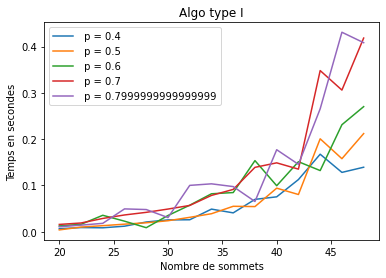

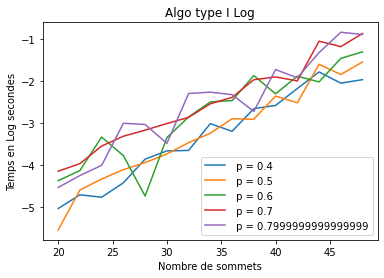

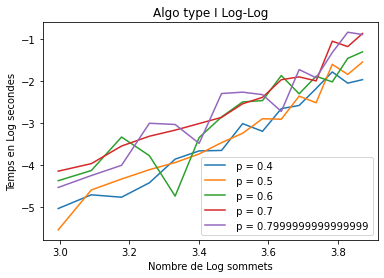

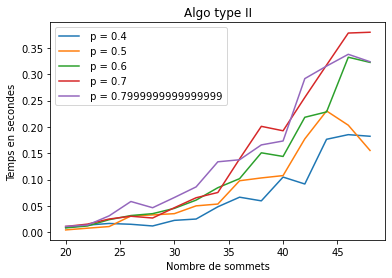

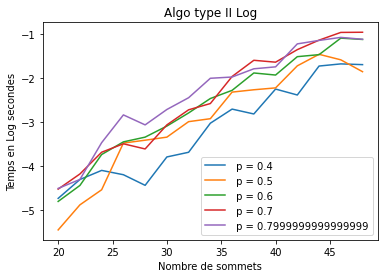

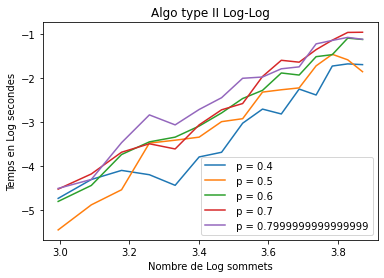

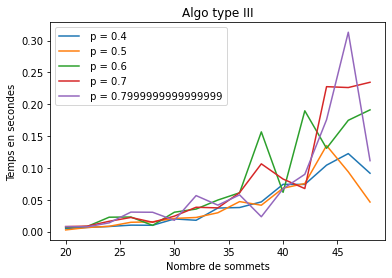

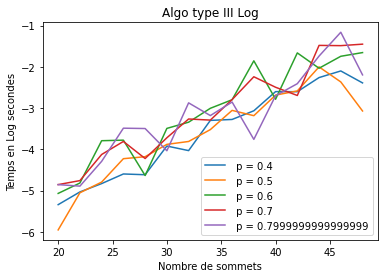

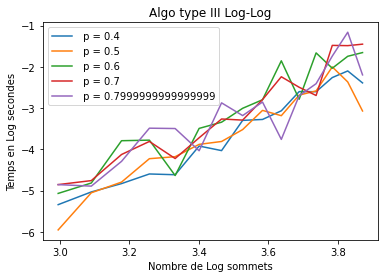

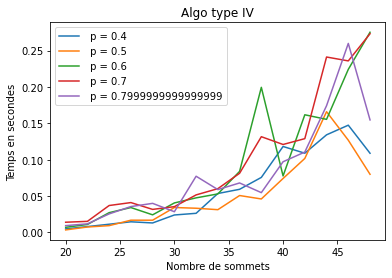

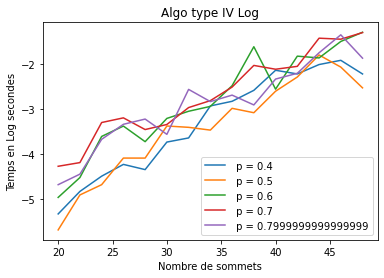

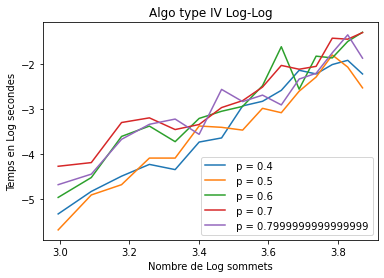

{'coeff_directeur': [('type I', [0.004746760640825544, 0.007436215877532959, 0.009206701176507131, 0.014386133636747086, 0.014211311510631016]), ('type II', [0.006197275434221541, 0.005394344670431955, 0.011231918845857893, 0.013185001271111624, 0.011177298852375577]), ('type III', [0.003102540118353707, 0.0015647147383008684, 0.006604203156062535, 0.008098573344094412, 0.0036993469510759624]), ('type IV', [0.003713463885443551, 0.002732248817171369, 0.009580961295536585, 0.009257344688688007, 0.005192436490740095])], 'coeff_directeur_log': [('type I', [0.10963407089298768, 0.14281137384913772, 0.10961440763403478, 0.11712522001905115, 0.1301248063324493]), ('type II', [0.1083421418035974, 0.12816500644675385, 0.13120075617791288, 0.12706462241379607, 0.12080456170134206]), ('type III', [0.10543339076158213, 0.10300480837658034, 0.12195496771152925, 0.121628310755914, 0.09503088944559131]), ('type IV', [0.11118358116801941, 0.11284314723103361, 0.13120497293869376, 0.10619369724759269,

In [60]:
n_p,_,P = parametre_grille_search(20,50,2,0.40,0.81,0.1) #nmin,nmax,pas_n,pmin,pmax,pas_p
liste_fonction = [dijkstra1,dijkstra2,dijkstra3,dijkstra4]
nom_liste_fonction = ['type I','type II','type III','type IV']
dico_bool = {'execution':True, 'nb_couverture': False, 'rapport': False}
dico_resultat = test_experimentale(n_p,P,10,liste_fonction,nom_liste_fonction,dico_bool)
print(dico_resultat)

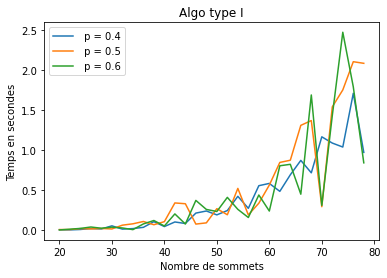

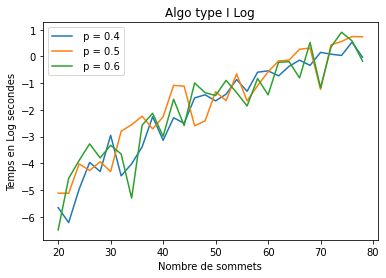

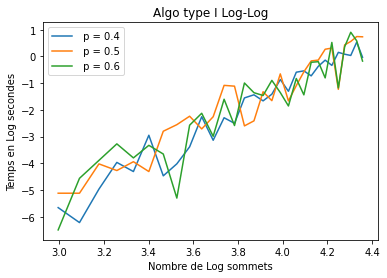

{'coeff_directeur': [('type I', [0.016663230698684167, 0.035809442914765455, 0.014449635456348288])], 'coeff_directeur_log': [('type I', [0.09702166433293204, 0.10090055981910592, 0.1089166961784157])], 'coeff_directeur_log_log': [('type I', [4.134719674887291, 4.30002446113049, 4.641643798927887])], 'execution': array([[3.49032879e-03, 1.99484825e-03, 6.98125362e-03, 1.89499855e-02,
        1.34633780e-02, 5.23601770e-02, 1.14692450e-02, 1.79685354e-02,
        3.39140892e-02, 1.04698420e-01, 4.34054136e-02, 1.00819945e-01,
        8.17828178e-02, 2.11686969e-01, 2.37863660e-01, 1.89493537e-01,
        2.43349671e-01, 4.21396494e-01, 2.71168590e-01, 5.53968549e-01,
        5.82458377e-01, 4.83209133e-01, 6.90028310e-01, 8.70120049e-01,
        7.14608550e-01, 1.16456103e+00, 1.08654547e+00, 1.03694713e+00,
        1.70841491e+00, 9.69957709e-01, 5.98526001e-03, 5.98275661e-03,
        1.79296732e-02, 1.39827728e-02, 1.94486380e-02, 1.34638548e-02,
        6.08406067e-02, 7.77901411e-0

In [153]:
n_p,_,P = parametre_grille_search(20,80,2,0.40,0.61,0.1) #nmin,nmax,pas_n,pmin,pmax,pas_p
liste_fonction = [dijkstra1]
nom_liste_fonction = ['type I']
dico_bool = {'execution':True, 'nb_couverture': False, 'rapport': False}
dico_resultat = test_experimentale(n_p,P,2,liste_fonction,nom_liste_fonction,dico_bool)
print(dico_resultat)

## test pl 

Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 18 rows, 19 columns and 38 nonzeros
Model fingerprint: 0x69dcba91
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.01s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Infeasible model
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 24 rows, 28 columns and 56 nonzeros
Model fingerprint: 0x065e4889
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.01s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Infeasible model
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (

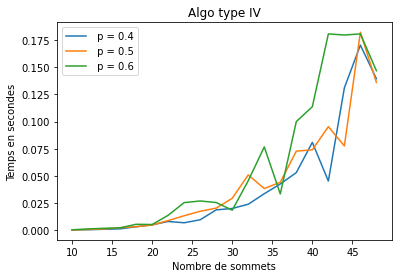

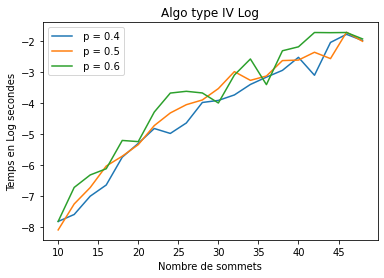

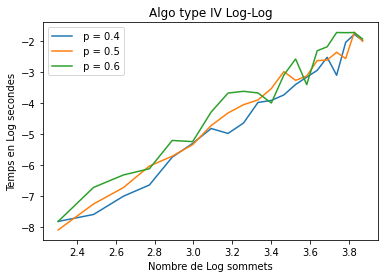

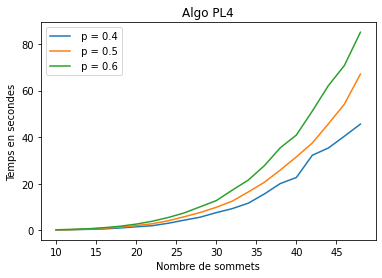

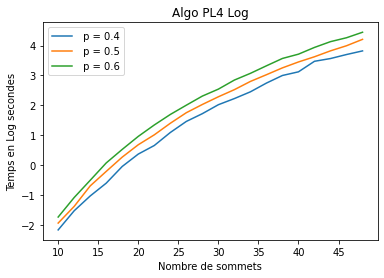

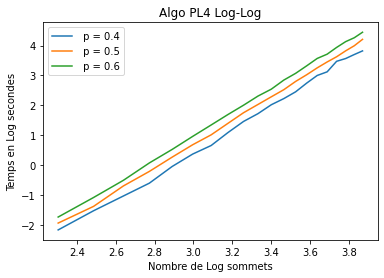

{'coeff_directeur': [('type IV', [0.0036588442953009353, 0.0035716841095372255, 0.003853691251654374]), ('PL4', [1.1972397001166093, 1.7618422131789357, 2.2348897657896347])], 'coeff_directeur_log': [('type IV', [0.15415055207642658, 0.1607211903069045, 0.15548230244655736]), ('PL4', [0.15750134105458766, 0.16164612612858562, 0.1625824718687249])], 'coeff_directeur_log_log': [('type IV', [3.734324580037788, 3.8934994614773597, 3.7665864699542655]), ('PL4', [3.8154980398477982, 3.915906196499293, 3.9385893388281135])], 'execution': array([[3.98468971e-04, 4.99057770e-04, 9.02342796e-04, 1.29661560e-03,
        3.19151878e-03, 4.98657227e-03, 8.07371140e-03, 6.88226223e-03,
        9.65394974e-03, 1.87544346e-02, 2.00458765e-02, 2.39367008e-02,
        3.36147785e-02, 4.25812960e-02, 5.30580997e-02, 8.08884621e-02,
        4.52740908e-02, 1.31020164e-01, 1.70396852e-01, 1.39434552e-01,
        3.02839279e-04, 7.01451302e-04, 1.19364262e-03, 2.39336491e-03,
        3.29494476e-03, 4.78668

In [150]:
n_p,_,P = parametre_grille_search(10,50,2,0.40,0.61,0.1) #nmin,nmax,pas_n,pmin,pmax,pas_p
liste_fonction = [PL4,dijkstra4]
nom_liste_fonction = ['PL4','type IV']
dico_bool = {'execution':True, 'nb_couverture': False, 'rapport': False}
dico_resultat = test_experimentale(n_p,P,10,liste_fonction,nom_liste_fonction,dico_bool)
print(dico_resultat)